In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [534]:
data = pd.read_csv("titanic_train.csv")

In [535]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [536]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

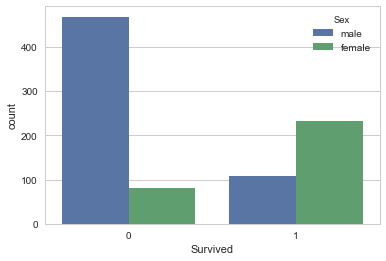

In [537]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,hue="Sex")

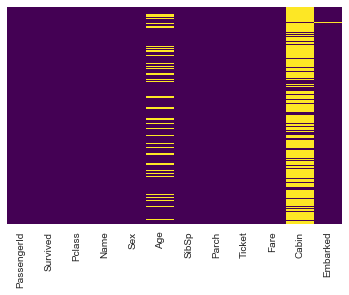

In [538]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

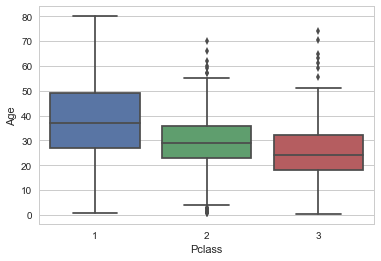

In [539]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [540]:
def clean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [541]:
data["Age"] = data[["Age","Pclass"]].apply(clean_age,axis=1)

In [542]:
#drop the cabin columns
data.drop("Cabin",axis=1,inplace=True)

In [543]:
#drop the data which have empty data
data.dropna(inplace=True)

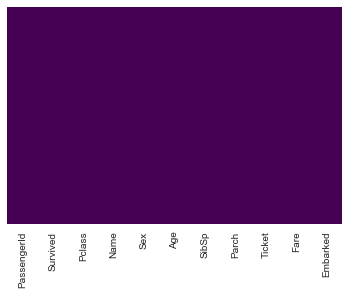

In [544]:
#too see if the the data cleaning was successfully done or not
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [546]:
#1=Male and 0=Female
sex = pd.get_dummies(data["Sex"],drop_first=True)
embark = pd.get_dummies(data["Embarked"],drop_first=True)

In [547]:
data.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [548]:
data = pd.concat([data,sex,embark],axis=1)

In [549]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Load test data 

In [550]:
test = pd.read_csv("titanic_test.csv")

In [551]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


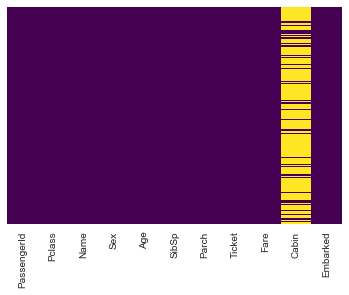

In [552]:
test["Age"] = test[["Age","Pclass"]].apply(clean_age,axis=1)
sns.heatmap(test.isnull(),yticklabels=False, cbar=False,cmap="viridis")

In [553]:
test.drop("Cabin",axis=1,inplace=True)

In [554]:
sex = pd.get_dummies(test["Sex"],drop_first=True)
embark = pd.get_dummies(test["Embarked"],drop_first=True)

In [555]:
#drop some columns which are not in train data
test.drop(["PassengerId","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
test=pd.concat([test,sex,embark],axis=1)
test.dropna(inplace=True)

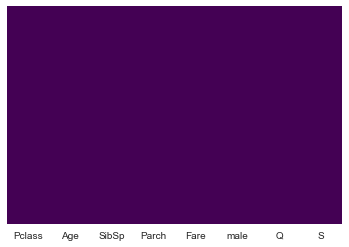

In [556]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Building a logistic regression model

In [557]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [558]:
X = data.drop("Survived",axis=1)
y = data["Survived"]
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [559]:
from sklearn.linear_model import LogisticRegression

In [560]:
logmodel = LogisticRegression()
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [566]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [562]:
def results(num):
    if predictions == 0:
        return ("die")
    else:
        return ("survived")

In [571]:
#here it goes the prediction by giving all the features
predictions = logmodel.predict(test.loc[1])
results(predictions)

/Users/tenzinwangpo/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'die'

In [572]:
#survive,die = df[df[0] == 1],df[df[0] == 0]
#survive.reset_index(inplace=True)
#del survive["index"]
#survive
#die.reset_index(inplace=True)
#del die["index"]
#survive